In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [45]:
df = pd.read_csv(r'C:\\Users\\Enzot\\OneDrive\\Documentos\\titanic.csv')

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
#clean null values
df = df.dropna(subset=['Survived','Pclass', 'Sex', 'Age'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
#did the social class of the passengers impact their life?

df.groupby(['Pclass', 'Survived']).count().reset_index()[['Pclass','Survived','Pclass']]

,Pclass,Survived,Pclass
0,1,0,1
1,1,1,1
2,2,0,2
3,2,1,2
4,3,0,3
5,3,1,3


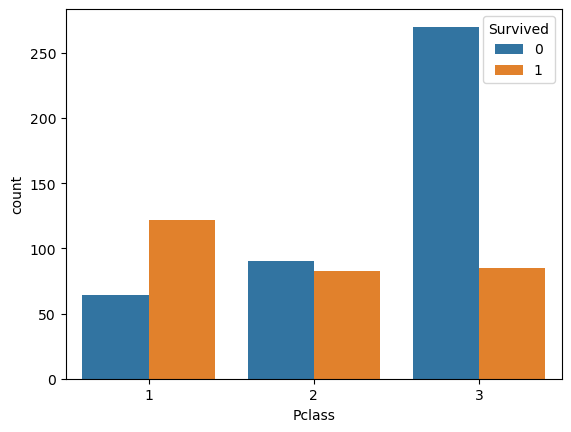

In [49]:
sns.countplot(x ='Pclass', hue = "Survived", data = df)
plt.show()

<AxesSubplot:xlabel='Survived'>

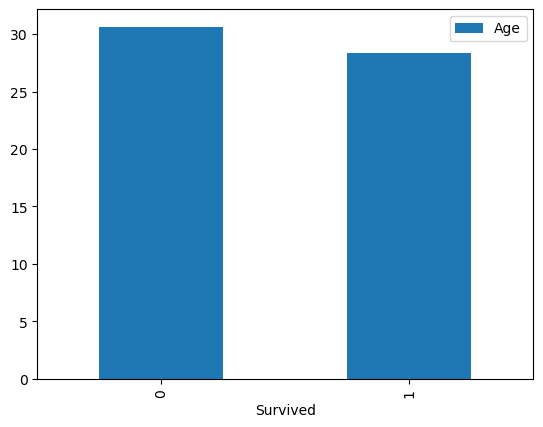

In [50]:
#Did the age of the passengers impact their life?
pd.pivot_table(df,index = 'Survived',values =['Age'] ).plot(kind="bar")

In [51]:
#Did the sex of the passengers impact their life?
df.groupby(['Sex', 'Survived']).count()['Name']

Sex     Survived
female  0            64
        1           197
male    0           360
        1            93
Name: Name, dtype: int64

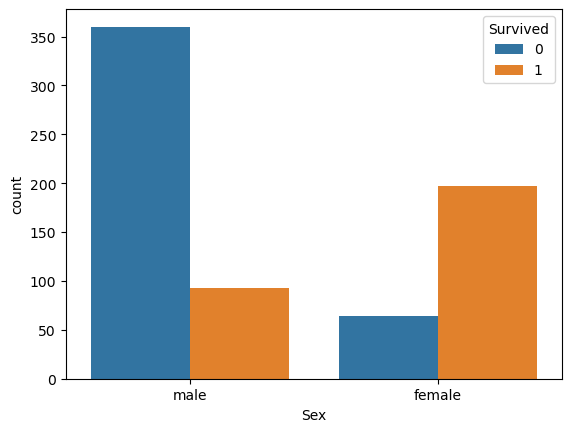

In [52]:
sns.countplot(x ='Sex', hue = "Survived", data = df)
plt.show()

In [53]:
# Extract the 'pclass' and 'Survived' columns as the features and target variables, respectively
X = df[['Pclass']]
y = df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using metrics such as accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)

coefficients = model.coef_[0][0]

print(f'Accuracy: {accuracy}')
print("Coefficients:", coefficients)

#The results suggest that logistic regression model has an accuracy of 0.68
#the coeficient of -0.738 for the pclass varuable indicates that this variable has a 
#negative influence on the model's output. Specifically, as the pclass value increaser, the prob. of survival decreases

Accuracy: 0.6853146853146853
Coefficients: -0.8361878132207807


In [54]:
# Prepare the data
X = df[['Age']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


#Accuracy model was around 61%

Accuracy: 0.6153846153846154
Precision: 0.5384615384615384
Recall: 0.125
F1 Score: 0.20289855072463767


In [55]:
# Prepare the data
X = df[['Sex']].replace({'male':1,'female':0})
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#An accuracy of .73  means that the SVM model was able to corectly classify 73% of the data points

Accuracy: 0.7342657342657343
